# TP Intro au Deep Learning avancé

Le but de TP est de vous faire découvrir certaines bonnes pratiques lorsque l'on fait du ML avec python, incluant des notebooks ou non. Pour faire cela, nous allons mettre en oeuvre un environnement virtuel, ainsi qu'un suivi d'expérience avec WandB sur un exemple de classification d'images.



## Pré-requis
- Python 3.10 ou plus
- Jupyter installé sur la machine.
- Créez un dossier pour le TP, par exemple :
```bash
mkdir tp-dl && cd tp-dl
```


## Introduction : gérer un environnement virtuel

Pour travailler proprement en Python (et encore plus en deep learning), il est recommandé d'utiliser un environnement virtuel (venv) pour isoler les versions de bibliothèques, garantir la reproductibilité de vos expériences et éviter de casser votre système.

Il existe plusieurs outils pour gérer ces environnements :
- pipenv : gestionnaire historique qui repose sur deux fichiers `Pipfile` et `Pipfile.lock`. Moins courant aujourd’hui mais encore répandu.  
- poetry : gestionnaire moderne basé sur `pyproject.toml`. Très utilisé, complet, mais un peu plus lent.  
- uv : outil récent, extrêmement rapide, compatible `pyproject.toml`, le standard actuel.  

Dans ce TP, vous pouvez choisir **l’une des trois méthodes** selon vos préférences et votre configuration personnelle. Si vous êtes sur les PCs de l'INSA, on environnement virtuel a déjà été configuré, voir la dernière partie de cette section. Attention à ne pas installer des bibliothèques imposantes (type pytorch) sur les PCs de l'INSA, car l'espace disque est limité.

Dans tous les cas, l’objectif est d’arriver à un environnement virtuel isolé avec les bonnes bibliothèques, et un kernel Jupyter dédié pour exécuter vos notebooks.


### Pipenv

Pipenv est un outil de gestion d'environnements virtuels et de dépendances pour les projets Python. Il utilise deux fichiers principaux : `Pipfile` pour définir les dépendances et `Pipfile.lock` pour verrouiller les versions exactes des paquets installés, assurant ainsi la reproductibilité des environnements.

#### Installer Pipenv
```bash
pip install --user pipenv
export PATH="$PATH:$HOME/.local/bin"
```

#### Créer l’environnement Pipenv et installer les dépendances

Pipenv utilise un fichier `Pipfile` pour définir les dépendances de votre projet. Vous pouvez créer ce fichier manuellement ou utiliser la commande `pipenv install` pour initialiser un nouvel environnement virtuel et installer les dépendances. Par exemple, pour install `numpy`, vous popuvez utiliser la commande suivante :

```bash
pipenv install numpy
```
Pour ce TP, un fichier `Pipfile` vous est fourni sur Moodle, vous pouvez y jeter un oeil pour voir les dépendances utilisées. Pour installer les dépendances listées dans ce fichier, utilisez la commande suivante :

```bash
pipenv install
```

#### Créer un kernel Jupyter

Pour utiliser Jupyter avec l’environnement virtuel géré par Pipenv, vous devez créer un kernel spécifique. Cela permet de sélectionner cet environnement dans Jupyter.

```bash
pipenv run python -m ipykernel install --user --name=dla-pipenv
```



### Poetry

Poetry est un outil complet qui gère à la fois les environnements virtuels et les dépendances. Il utilise un fichier `pyproject.toml` pour définir les dépendances de votre projet. Ce fichier vous est fourni sur Moodle, vous pouvez y jeter un oeil pour voir les dépendance utilisées.

#### Installer Poetry (si besoin)
```bash
pip install --user poetry
export PATH="$PATH:$HOME/.local/bin"
```

#### Installer les dépendances depuis pyproject.toml

```bash
poetry install
```
NB : Vous pouvez aussi installer un package manuellement avec `poetry add <package>`.

#### Créer un kernel Jupyter

De manière similaire à Pipenv, pour utiliser Jupyter avec l’environnement virtuel géré par Poetry, vous devez créer un kernel dédié.

```bash    
poetry run python -m ipykernel install --user --name=dla-poetry
```


### uv

uv est un outil récent, extrêmement rapide, compatible `pyproject.toml`, et constitue le standard actuel.  Il est très simple d'utilisation et s'intègre bien avec Jupyter. Attention cependant, le format du fichier `pyproject.toml` diffère de celui de poetry.

#### Installer uv (si besoin)

```bash
curl -LsSf https://astral.sh/uv/install.sh | sh
```
ou bien via pipx: 
```bash
pip install --user pipx
pipx install uv
```

#### Créer l’environnement et installer les dépendances
Comme pour pipenv et poetry, vous pouvez aussi installer les dépendances manuellement avec `uv add <package>`.

```bash
uv init
uv add ipykernel torch torchvision matplotlib wandb 
uv sync
```

#### Créer un kernel Jupyter
```bash
uv run python -m ipykernel install --user --name=dla-uv
```

## À l'INSA

Sur les PCs de l'INSA, un environnement virtuel a déjà été configuré avec via un venv, ancêtre de pipenv/poetry/uv. Vous pouvez donc directement utiliser cet environnement. Pour cela, ouvrez un terminal et naviguez jusqu'au dossier du TP, puis activez l'environnement virtuel avec la commande suivante :

```bash
source /opt/venv/iti-dla/bin/activate
```

Puis pensez à créer votre kernel jupyter pour cet environnement avec la commande suivante :

```bash
python -m ipykernel install --user --name=dla
```


## Fallback

Si rien de tout cela ne marche, vous pouvez toujours utiliser google colab, qui est un environnement en ligne gratuit avec beaucoup de ressources. Vous pouvez y importer vos notebooks et y installer les bibliothèques nécessaires via des cellules de code. Notez cependant que l'utilisation de colab peut être limitée par des quotas d'utilisation et que la configuration de l'environnement peut être moins flexible que sur une installation locale. De plus, cela nécessite un compte Google et vous serez dépendant du service. 

# CNN basique pour MNIST

Maintenant que notre environnement est prêt, nous allons créer un réseau de neurones convolutif basique pour classer les images du dataset MNIST en utilisant la bibliotèque pytorch.





## Configuration pour pytorch

Vérifiez que votre environnement virtuel contient les dépendances aux bibliothèques `torch` et `torchvision`. Si cela n'est pas le cas, ajoutez les.
Puis, testez l'import de torch. (cela peut prendre un peu de temps)

In [1]:
import torch
import torch.nn as nn
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 4070 Laptop GPU


## Préparation des données

Pour ce TP, nous allons utiliser le fameux dataset MNIST pour faire un modèle de classification d'images. Nous allons donc, dans un premier temps, téléchargez le dataset et le préparer pour l'entraînement.

In [2]:
# Chargement de MNIST
from torchvision import datasets, transforms

# Chargement des données
train_data = datasets.MNIST(
    root = '../data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

test_data = datasets.MNIST(
    root = '../data', 
    train = False, 
    transform = transforms.ToTensor()
)

print(len(train_data), len(test_data))

100.0%
100.0%
100.0%
100.0%

60000 10000


In [4]:
#Créez vos dataloaders (attention à la taille des batchs !)
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

##  Création du Réseau CNN

   Implémentez une classe `CNN` qui hérite de `nn.Module`. Cette classe doit comporter les couches suivantes :
   - Une première couche de convolution `conv1` qui prend en entrée des images en niveaux de gris et génère 16 canaux de sortie. Utilisez un noyau de convolution de taille 3x3 avec un padding de 1.
   - Une couche d'activation ReLU.
   - Une couche de pooling maximal `max_pool_2D` avec une fenêtre de 2x2 et un stride de 2.
   - Une deuxième couche de convolution `conv2` qui prend en entrée les 16 canaux de sortie de la première couche de convolution et génère 32 canaux de sortie, avec les mêmes paramètres de noyau et de padding.
   - Une autre couche d'activation ReLU.
   - Une autre couche de pooling maximal de même type que le premier.
   - Une couche entièrement connectée `fc1` qui prend en entrée les sorties aplaties des couches précédentes et a une dimension 128 en sortie.
   - Une autre couche entièrement connectée `fc2` avec autant de dimensions en sortie que de classes dans MNIST.


Implémentez votre processus d'apprentissage sur 10 epochs avec un learning rate de 10e-3 et une fonction de coût de type CrossEntropyLoss.

In [8]:
# Definition du modele
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
# Definition de la boucle d'apprentissage

def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    current_loss = []
    nb_ok = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        nb_ok += (output.argmax(dim=1) == target).float().sum()
        loss = criterion(output, target)
        current_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    current_loss = sum(current_loss)/len(current_loss)
    print(f"Epoch {epoch} - loss: {current_loss:.2f}")
    acc_train = nb_ok/len(train_loader.dataset)
    print(f"Accuracy: {acc_train:.2f}")
    return current_loss, acc_train

# Definition de la boucle de test
def test(model, test_loader, criterion):
    model.eval()
    test_loss = []
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            cur_loss = criterion(output, target)
            test_loss.append(cur_loss.item())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss = sum(test_loss)/len(test_loader)
    acc_loss = correct/len(test_loader.dataset)
    print(f"Test set: Average loss: {test_loss:.2f}, Accuracy: {acc_loss:.2f}")
    return test_loss, acc_loss

model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Apprentissage
train_acc, test_acc = [], []
train_loss, test_loss = [], []

for epoch in range(1, 11):
    train_loss_cur, train_acc_cur = train(model, train_loader, optimizer, criterion, epoch)
    test_loss_cur, test_acc_cur = test(model, test_loader, criterion)
    train_acc.append(train_acc_cur)
    test_acc.append(test_acc_cur)
    train_loss.append(train_loss_cur)
    test_loss.append(test_loss_cur)

Epoch 1 - loss: 0.24
Accuracy: 0.93
Test set: Average loss: 0.06, Accuracy: 0.98
Epoch 2 - loss: 0.06
Accuracy: 0.98
Test set: Average loss: 0.05, Accuracy: 0.99
Epoch 3 - loss: 0.05
Accuracy: 0.99
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 4 - loss: 0.03
Accuracy: 0.99
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 5 - loss: 0.03
Accuracy: 0.99
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 6 - loss: 0.02
Accuracy: 0.99
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 7 - loss: 0.02
Accuracy: 0.99
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 8 - loss: 0.02
Accuracy: 1.00
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 9 - loss: 0.01
Accuracy: 1.00
Test set: Average loss: 0.03, Accuracy: 0.99
Epoch 10 - loss: 0.01
Accuracy: 1.00
Test set: Average loss: 0.03, Accuracy: 0.99


Mettez en place un code qui permet de visualisez l'évoluation de votre apprentissage. Tout s'est bien passé ?

Vous devriez manquer d'une bibliothèque ? Comment vous résolvez ce problème ?

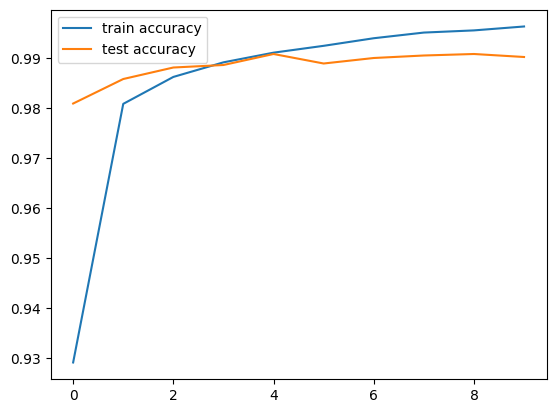

In [10]:
# install de matplotlib avec poetry !!
import matplotlib.pyplot as plt
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='test accuracy')
plt.legend()


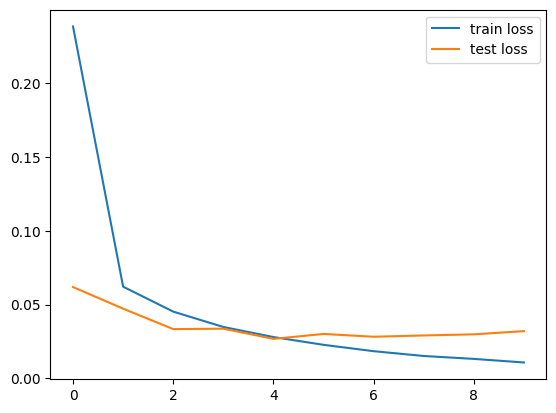

In [11]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()

# Modularisation

La modularisation est une bonne pratique pour rendre votre code plus lisible et maintenable. Elle consiste à séparer les différentes parties de votre code en modules, afin de mieux structurer votre projet.
Par exemple :

- `model.py`: définition de l'architecture du modèle
- `train.py`: code pour l'entraînement du modèle
- `evaluate.py`: code pour l'évaluation du modèle
- `predict.py`:  code pour la prédiction avec le modèle


## Structure de Dossier

Afin de mieux vous repérez et mieux structurer votre dossier, vous pouvez suivre l'exemple suivant:

```sh
my_project/
│
├── data/ # les données, générées par pytorch ou non 
│
├── models/
│   ├── __init__.py  # Permet d'importer le module 
│   ├── model.py # La définition de l'architecture. Peut prendre des noms plus explicites
│
├── notebooks/             # Dossier pour les notebooks, réservés à l'exploration et le prototypage
│
├── src/ # Scripts pour l'entraînement, l'évaluation, etc.
│   ├── train.py       
│   ├── evaluate.py
│   └── predict.py
│
├── utils/ # tous les outils annexes nécessaires pour la gestion/visualization de votre projet
│
├── tests/                 # Tests unitaires ( si si, c'est une bonne pratique)
│
├── pyprojet.toml ou Pipfile       # Votre config venv
├── README.md              # Description du projet et instructions
```

1. Réorganisez votre projet en suivant cette structure.

2. Faites tourner votre nouveau code avec l'environnement virtuel.

# Suivi des expériences

Afin de maximiser la reproducibilité des résultats, il est important de garder une trace des expériences que vous avez menées. Pour cela, vous pouvez utiliser des outils comme [mlflow](https://mlflow.org/docs/latest/index.html) ou [wandb](https://wandb.ai/site).

Dans ce TP, nous allons tester la solution wandb.

## Installation de wandb

1. Installez wandb dans votre environnement virtuel
2. Créez un compte sur le site de wandb
3. Renseignez votre clé d'API dans votre environnement : `wandb login`

## Utilisation de wandb

Pour enregistrer les différentes métriques, il faut procéder à plusieurs étapes au sein de votre code:
 * Se connecter sur la plateforme wandb avec la fonction  `wandb.login()`
 * Initialiser un run avec la fonction `wandb.init()`. Il vous alors renseigner un nom de projet (paramètre `project`), qui regroupera les différentes expériences, ainsi que l'ensemble des hyperaramètres de votre modèle (paramètre `config` sous forme d'un dictionnaire). 
 * Logger les différentes métriques avec la fonction `wandb.log()`. Implémentez cette fonction à un endroit stratégique de votre code, par exemple à la fin de chaque epoch.

Une fois cela fait, vous pouvez lancer une expérience et visualisez les résultats sur la plateforme wandb.

Exemple d'un résultat sur wandb:

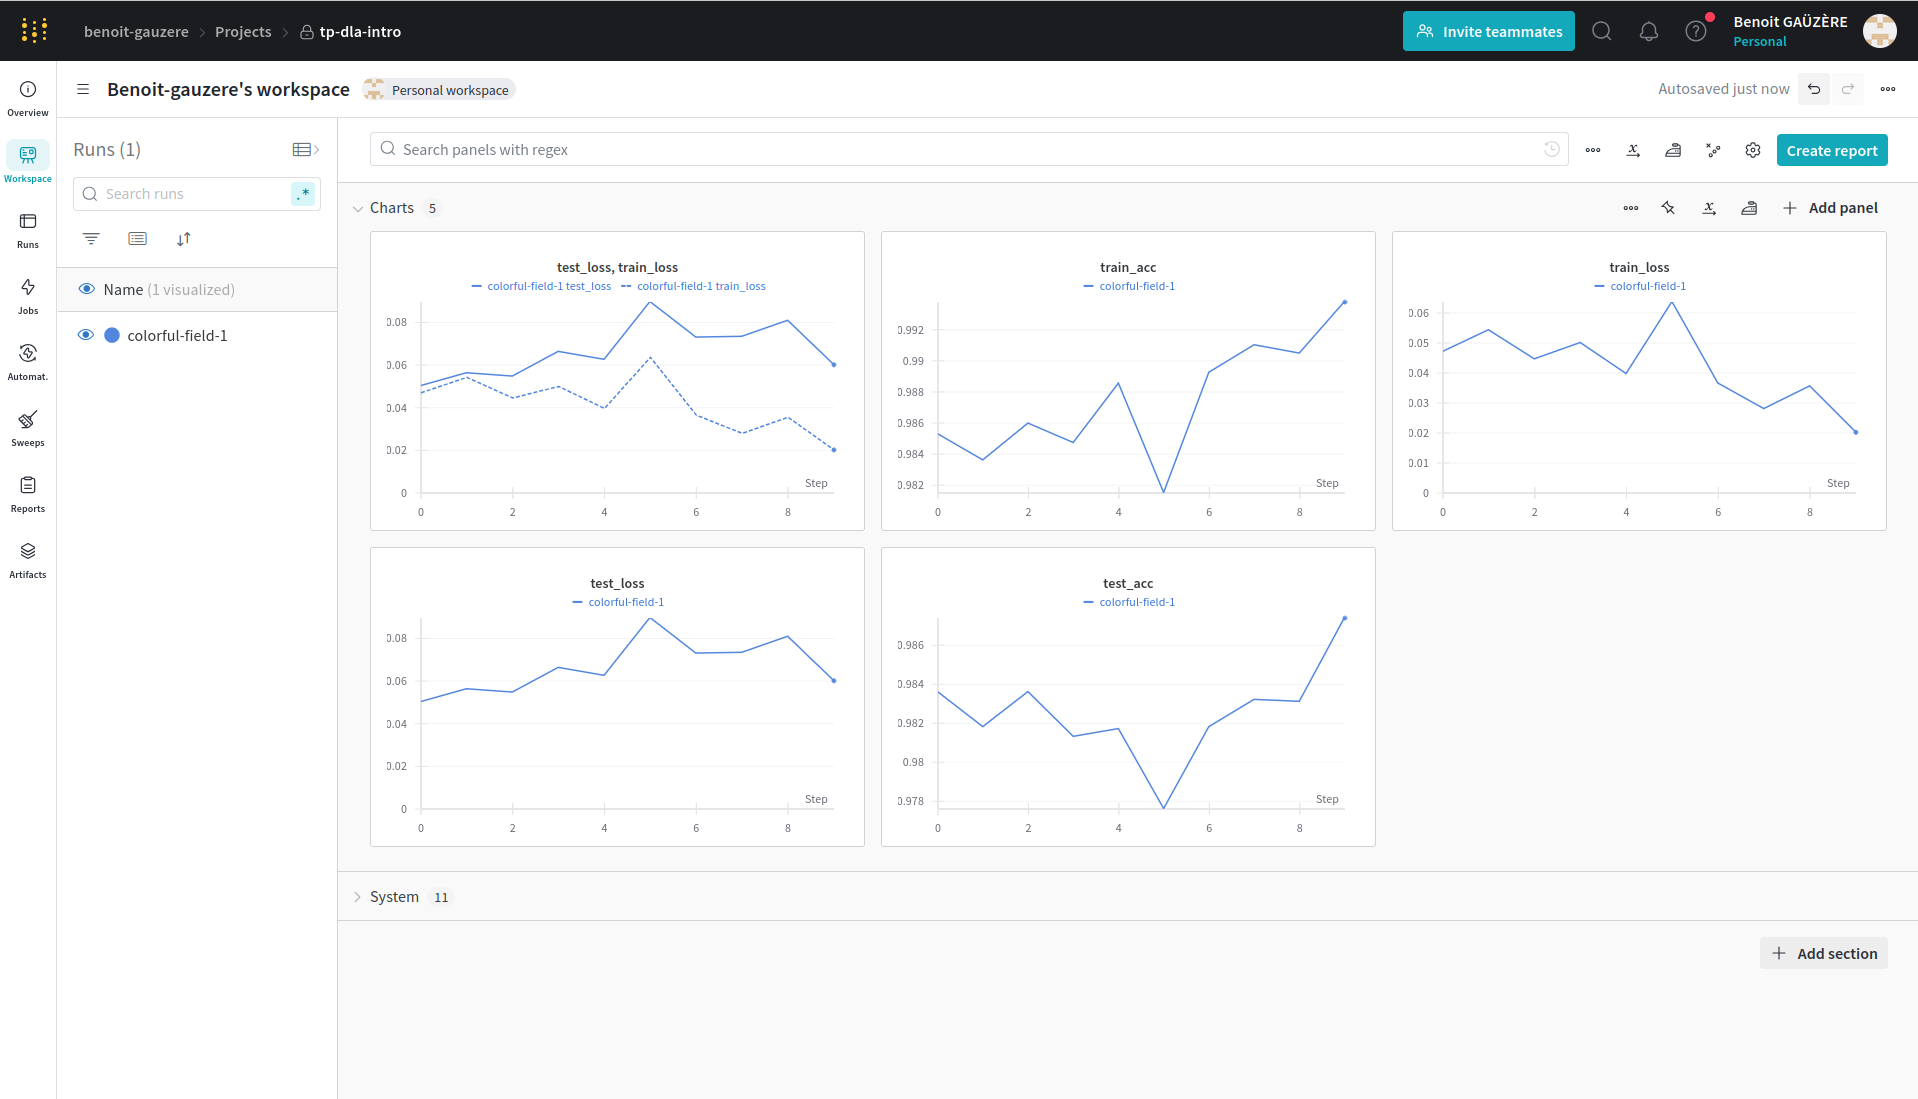

Ce TP est un exemple basique de ce que vous pouvez faire avec wandb. Vous pouvez également l'utiliser pour des projets plus complexes, enregistrer plus de données et optimiser votre recherche d'hyperparamètres.



# Pour aller plus loin

1. Rajouter un ensemble de validation pour évaluer les performances de votre modèle selon les différentes architectures. Intégrer les résultats dans wandb.

2. Tester [MLFlow](https://mlflow.org/docs/latest/getting-started/intro-quickstart/index.html) ou tensorboard pour le suivi des expériences .